In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC,SVC
%matplotlib inline


In [7]:
# Lista de arquivos ossos original (sem desmineralização)
lista_arq_ossos=os.listdir('Dados/original/')
# Lista de arquivos ossos desmineralização 1
lista_arq_desm1=os.listdir('Dados/desm1/')
# Lista de arquivos ossos desmineralização 2
lista_arq_desm2=os.listdir('Dados/desm2/')
# Lista de arquivos ossos desmineralização 3
lista_arq_desm3=os.listdir('Dados/desm3/')

# Quantidade total de sinais
total_signal = len(lista_arq_ossos)+len(lista_arq_desm1)+len(lista_arq_desm2)+len(lista_arq_desm3)+1
# Matriz zerada para comportar todos os sinais
ossos = np.zeros((total_signal,15997))
# Matriz zerada para comportar todas as classes
classes = np.zeros((total_signal))

data_len = 15999

# Lendo os sinais de ossos sem desmineralização
i=0
# Lendo os sinais de ossos desmineralização 1
for nome2 in lista_arq_desm1:
    arq = open('Dados/desm1/'+nome2,'r')
    data = arq.readlines()
    data = [float(x) for x in data]
    data = data [2:data_len]
    data = np.array(data)
    ossos[i,:]=data
    classes[i] = 1
    i = i+1
    data=0
    arq.close()

for nome3 in lista_arq_desm2:
    arq = open('Dados/desm2/'+nome3,'r')
    data = arq.readlines()
    data = [float(x) for x in data]
    data = data [2:data_len]
    data = np.array(data)
    ossos[i,:]=data
    classes[i] = 2
    i = i+1
    data=0
    arq.close()



for nome4 in lista_arq_desm3:
    arq = open('Dados/desm3/'+nome4,'r')
    data = arq.readlines()
    data = [float(x) for x in data]
    data = data [2:data_len]
    data = np.array(data)
    ossos[i,:]=data
    classes[i] = 3
    i = i+1
    data=0
    arq.close()
time = []
for i in range(1,16001):
    time.append(i*2e-8)
ossos = ossos[0:i,:]
classes = classes[0:i]
ossos_df = pd.DataFrame(ossos)
classes_df= pd.DataFrame(classes)
classes_df['Desm'] = classes_df[0]
classes_df = classes_df.drop(0,axis=1)
result = pd.concat([ossos_df, classes_df], axis=1, sort=False)
result

,0,1,2,3,4,5,6,7,8,9,...,15988,15989,15990,15991,15992,15993,15994,15995,15996,Desm
0,-0.000150,-0.000150,-0.000150,-0.000150,-0.00015,-0.00015,-0.00015,-0.00015,-0.00015,-0.00015,...,-0.000391,-0.000391,-0.000391,-0.000271,-0.000271,-0.000271,-0.000271,-0.000271,-0.000271,1.0
1,-0.000100,-0.000100,-0.000100,-0.000100,-0.00010,-0.00010,-0.00010,-0.00010,-0.00010,-0.00010,...,-0.000422,-0.000422,-0.000422,-0.000422,-0.000422,-0.000422,-0.000422,-0.000422,-0.000422,1.0
2,-0.000100,-0.000100,-0.000100,-0.000100,-0.00010,-0.00010,-0.00010,-0.00010,-0.00010,-0.00010,...,-0.000582,-0.000743,-0.000743,-0.000743,-0.000743,-0.000743,-0.000743,-0.000743,-0.000743,1.0
3,-0.000200,-0.000200,-0.000200,-0.000200,-0.00020,-0.00020,-0.00020,-0.00020,-0.00020,-0.00020,...,-0.000200,-0.000200,-0.000200,-0.000200,-0.000200,-0.000200,-0.000200,-0.000200,-0.000200,1.0
4,-0.000039,-0.000039,-0.000039,-0.000039,-0.00020,-0.00020,-0.00020,-0.00020,-0.00020,-0.00020,...,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000122,0.000282,0.000282,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1655,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1656,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1657,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [2]:
ossos_df.iloc[0,:]

0       -0.000150
1       -0.000150
2       -0.000150
3       -0.000150
4       -0.000150
           ...   
15992   -0.000271
15993   -0.000271
15994   -0.000271
15995   -0.000271
15996   -0.000271
Name: 0, Length: 15997, dtype: float64

In [4]:
X = result.drop(['Desm'],axis=1)
y = result['Desm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, pred_lr))
cm_lr= confusion_matrix(y_test, pred_lr)
cm_lr

c:\users\lucas.barbosa\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lucas.barbosa\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66       136
         1.0       0.50      0.07      0.12        88
         2.0       0.48      0.34      0.40       146
         3.0       0.56      0.48      0.52       128

    accuracy                           0.51       498
   macro avg       0.51      0.47      0.42       498
weighted avg       0.51      0.51      0.45       498



array([[136,   0,   0,   0],
       [ 55,   6,  20,   7],
       [ 52,   4,  49,  41],
       [ 31,   2,  33,  62]], dtype=int64)

Text(0, 0.5, 'Error Rate')

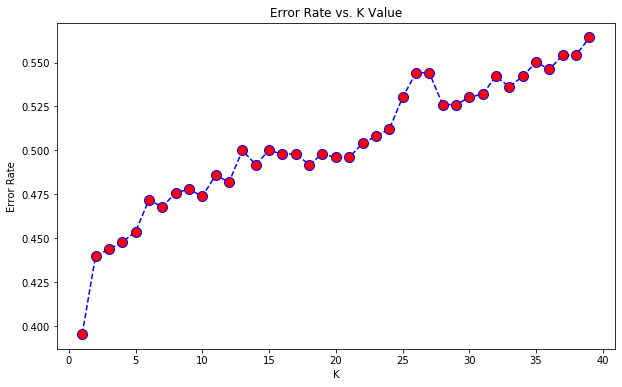

In [5]:
error_rate = []

# Levará algum tempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [6]:
clf = SVC(gamma='scale', decision_function_shape='ovo')
X = result.drop(['Desm'],axis=1)
y = result['Desm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train,y_train) 
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
cm_clf= confusion_matrix(y_test, pred_clf)
print(cm_clf)

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       140
         1.0       0.53      0.48      0.50        87
         2.0       0.58      0.49      0.53       147
         3.0       0.63      0.69      0.66       124

    accuracy                           0.68       498
   macro avg       0.65      0.66      0.66       498
weighted avg       0.67      0.68      0.67       498

[[140   0   0   0]
 [ 10  42  26   9]
 [  7  27  72  41]
 [  1  11  27  85]]


In [11]:
X = result.drop(['Desm'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
pred_kmeans = kmeans.predict(X_test)
print(classification_report(y_test, pred_kmeans))
cm_kmeans= confusion_matrix(y_test, pred_kmeans)
print(cm_kmeans)

c:\users\lucas.barbosa\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       120
         1.0       0.22      1.00      0.35       107
         2.0       0.00      0.00      0.00       144
         3.0       0.00      0.00      0.00       127

    accuracy                           0.21       498
   macro avg       0.05      0.25      0.09       498
weighted avg       0.05      0.21      0.08       498

[[  0 120   0   0]
 [  0 107   0   0]
 [  2 142   0   0]
 [  0 127   0   0]]
